# Initialization

## Imports


In [51]:
# add src to path
from pyprojroot import here
import sys

sys.path.append(str(here("src")))

# import analysis_utils
from code.models import *
from code.analysis_utils import *

# load other libraries
from dotenv import load_dotenv
import logging
from pandas.errors import SettingWithCopyWarning

load_dotenv()

from code.make_figs import FigureGenerator
from code.analysis_pipeline import AnalysisPipeline

# suppress logging and warnings
import warnings

logging.getLogger("code.utils").setLevel(
    logging.WARNING
)  # suppress logging of dataset sizes from train_utils
logging.getLogger("code.models").setLevel(
    logging.WARNING
)  # suppress logging of model parameters from models.py
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# configure numpy and pytorch to print entire arrays/tensors
np.set_printoptions(threshold=np.inf)
torch.set_printoptions(threshold=torch.inf)

## Set up analysis pipeline


In [52]:
# choose variables to evaluate
CONTEXT_LENGTH_TO_EVAL = [64]
MLP_EXPANSION_FACTOR_TO_EVAL = [4]
NUM_DIMS_TO_EVAL = [8]
NUM_TASKS_TO_EVAL = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
SETTING = "linear-regression"
EXP_NAME = "full-exp-params"
INCLUDE_OPTIMAL_CONSTANT_SOLUTION = True

fixed_values = {
    "context_length": CONTEXT_LENGTH_TO_EVAL[0],
    "mlp_expansion_factor": MLP_EXPANSION_FACTOR_TO_EVAL[0],
    "num_dims": NUM_DIMS_TO_EVAL[0],
}

analysis_pipeline = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_NAME,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    include_optimal_constant_solution=INCLUDE_OPTIMAL_CONSTANT_SOLUTION,
)

experiment params:  {'setting': 'linear-regression', 'num_dims_lst': [8, 12, 16], 'num_tasks_lst': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096], 'context_length_lst': [16, 32, 64], 'mlp_expansion_factor_lst': [0.5, 4, 8], 'random_seed': 1, 'num_hidden_layers': 8, 'hidden_size': 64, 'batch_size': 128, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92192, 

  0%|          | 0/29700 [00:00<?, ?it/s]

## Process data

In [53]:
algo_df = analysis_pipeline.process_algo_df(
    analysis_pipeline.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [54]:
transformer_df_all_checkpoints = analysis_pipeline.process_transformer_df(
    analysis_pipeline.transformer_df_raw,
    algo_df=algo_df,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    load_saved_evaluation=True,
    compute_distance_from_algos=True,
)

transformer_df = transformer_df_all_checkpoints

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

In [55]:
model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df,
    algo_df=algo_df,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[-1],
    context_length=CONTEXT_LENGTH_TO_EVAL[-1],
    num_dims=NUM_DIMS_TO_EVAL[-1],
    params_init=analysis_pipeline.params_init,
    metric_name=analysis_pipeline.metric_name,
    load_saved_evaluation=True,
    remove_last_prediction=analysis_pipeline.remove_last_prediction,
    add_to_df=True,
    out_column="bms_multiple_predictor_results",
    baseline_lst=["random_weights_baseline"],
    include_optimal_constant_solution=INCLUDE_OPTIMAL_CONSTANT_SOLUTION,
)
transformer_df, history, model = model_fitter.fit()

batch_size:  128
train_checkpoints: [   20    58   115   193   291   408   545   703   879  1076  1293  1529
  1785  2062  2357  2673  3009  3364  3739  4135  4549  4984  5439  5913
  6407  6921  7455  8009  8583  9176  9789 10422 11075 11748 12441 13153
 13885 14637 15409 16201 17013 17844 18695 19566 20457 21368 22298 23249
 24219 25209 26219 27249 28298 29368 30457 31566 32695 33844 35012 36201
 37409 38637 39885 41153 42440 43747 45075 46422 47789 49175 50582 52008
 53455 54921 56407 57912 59438 60983 62548 64133] 
train_num_tasks: [   4    8   16   32   64  128  256  512 1024]
Processing 1100 rows...
Training HierarchicalBayesianModel model with 720 batches...
Starting optimization with 3 parameters
Initial parameter values: [-0.79850769 -0.43078297 -4.60517025]
Optimizing with L-BFGS-B...


 This problem is unconstrained.                                        


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80976D-01    |proj g|=  1.22070D+00



At iterate    1    f=  3.74644D-01    |proj g|=  7.10390D-02



At iterate    2    f=  3.70461D-01    |proj g|=  3.41317D-01



At iterate    3    f=  3.66478D-01    |proj g|=  8.18776D-01



At iterate    4    f=  3.63065D-01    |proj g|=  8.70296D-01



At iterate    5    f=  3.57185D-01    |proj g|=  4.16661D-02



At iterate    6    f=  3.56446D-01    |proj g|=  5.81127D-02



At iterate    7    f=  3.54807D-01    |proj g|=  1.48143D-01



At iterate    8    f=  3.42857D-01    |proj g|=  5.25944D-01



At iterate    9    f=  3.11116D-01    |proj g|=  3.44051D-01



At iterate   10    f=  3.04628D-01    |proj g|=  1.00325D+00



At iterate   11    f=  2.98472D-01    |proj g|=  4.11717D-01



At iterate   12    f=  2.96610D-01    |proj g|=  5.05782D-01



At iterate   13    f=  2.94327D-01    |proj g|=  5.72112D-01



At iterate   14    f=  2.88725D-01    |proj g|=  4.70943D-01



At iterate   15    f=  2.80236D-01    |proj g|=  3.60073D-01



At iterate   16    f=  2.71598D-01    |proj g|=  6.76402D-02



At iterate   17    f=  2.64806D-01    |proj g|=  2.13593D-01



At iterate   18    f=  2.61455D-01    |proj g|=  2.84243D-01



At iterate   19    f=  2.54886D-01    |proj g|=  1.58455D-01



At iterate   20    f=  2.50140D-01    |proj g|=  1.66337D-01



At iterate   21    f=  2.45874D-01    |proj g|=  5.84426D-02



At iterate   22    f=  2.44080D-01    |proj g|=  1.97742D-01



At iterate   23    f=  2.40860D-01    |proj g|=  1.49943D-01



At iterate   24    f=  2.39084D-01    |proj g|=  3.47687D-02



At iterate   25    f=  2.37347D-01    |proj g|=  9.42235D-02



At iterate   26    f=  2.35181D-01    |proj g|=  5.55343D-02



At iterate   27    f=  2.33745D-01    |proj g|=  7.95275D-02



At iterate   28    f=  2.32426D-01    |proj g|=  1.54187D-02



At iterate   29    f=  2.31604D-01    |proj g|=  5.63848D-02



At iterate   30    f=  2.31215D-01    |proj g|=  9.16188D-02



At iterate   31    f=  2.30683D-01    |proj g|=  3.77596D-02



At iterate   32    f=  2.30219D-01    |proj g|=  1.70966D-02



At iterate   33    f=  2.29719D-01    |proj g|=  1.64572D-02



At iterate   34    f=  2.29305D-01    |proj g|=  2.17025D-02



At iterate   35    f=  2.29131D-01    |proj g|=  2.21789D-02



At iterate   36    f=  2.28908D-01    |proj g|=  2.47993D-02



At iterate   37    f=  2.28752D-01    |proj g|=  7.06090D-03



At iterate   38    f=  2.28629D-01    |proj g|=  2.76215D-02



At iterate   39    f=  2.28554D-01    |proj g|=  1.50114D-02



At iterate   40    f=  2.28466D-01    |proj g|=  1.92720D-02



At iterate   41    f=  2.28376D-01    |proj g|=  1.25987D-02



At iterate   42    f=  2.28328D-01    |proj g|=  2.88425D-03



At iterate   43    f=  2.28298D-01    |proj g|=  1.14274D-02



At iterate   44    f=  2.28267D-01    |proj g|=  1.06876D-03



At iterate   45    f=  2.28254D-01    |proj g|=  3.98233D-03



At iterate   46    f=  2.28246D-01    |proj g|=  2.78525D-03



At iterate   47    f=  2.28241D-01    |proj g|=  5.77799D-04



At iterate   48    f=  2.28238D-01    |proj g|=  6.05179D-04



At iterate   49    f=  2.28238D-01    |proj g|=  1.79796D-04



At iterate   50    f=  2.28237D-01    |proj g|=  1.86193D-04



At iterate   51    f=  2.28236D-01    |proj g|=  1.81206D-04



At iterate   52    f=  2.28236D-01    |proj g|=  2.65088D-04



At iterate   53    f=  2.28236D-01    |proj g|=  1.91081D-04



At iterate   54    f=  2.28236D-01    |proj g|=  1.97787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     54     68      1     0     0   1.978D-04   2.282D-01
  F =  0.22823567688465118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Optimization complete with final loss: 0.228236
Final parameter values: [ -1.20512441 -13.24033636 -11.04213761] (when exponentiated: [2.99654717e-01 1.77744013e-06 1.60125525e-05])


  0%|          | 0/1100 [00:00<?, ?it/s]

# Analysis


In [56]:
# set up FigureGenerator
fig_gen = FigureGenerator(
    transformer_df,
    transformer_df_all_checkpoints,
    algo_df,
    SETTING,
    include_optimal_constant_solution=INCLUDE_OPTIMAL_CONSTANT_SOLUTION,
)

Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc


## Approximate interpolation threshold

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 29 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'E', 'I', 'M', 'S', 'T', 'a', 'e', 'eight', 'five', 'four', 'g', 'i', 'n', 'nonmarkingreturn', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 12, 13, 22, 31, 45, 47, 62, 105, 110, 120, 123, 125, 136, 152, 163, 171, 173, 174, 176, 192, 200, 204, 206, 211, 228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 29 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'E', 

Saved figure to /sailhome/wurgaft/normative-icl/figures/linear-regression/interpolation_threshold/interpolation_threshold-linear-regression-64context_length__4mlp_expansion_factor__8num_dims.pdf


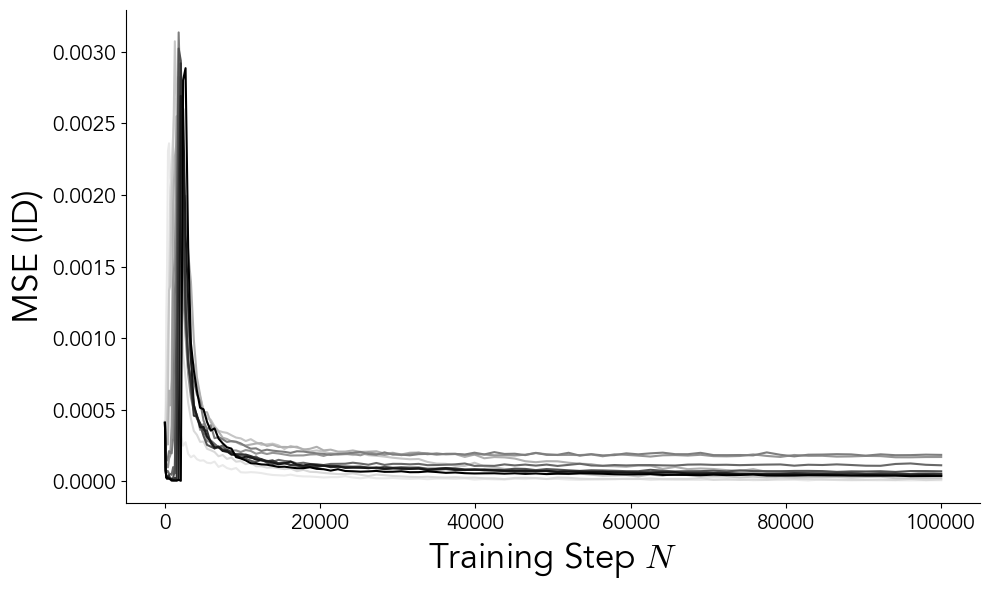

In [57]:
fig, ax = fig_gen.generate_interpolation_threshold_plot(
    config={"fixed_values": fixed_values}, show=True, save=True
)

## Relative distance phase diagram

Bbox(x0=0.12355555555555559, y0=0.14254629629629634, x1=0.8700000000000001, y1=0.975)


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'E', 'K', 'M', 'S', 'T', 'a', 'e', 'eight', 'five', 'four', 'g', 'i', 'k', 'n', 'nonmarkingreturn', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 12, 13, 28, 31, 45, 47, 62, 105, 110, 120, 123, 125, 136, 142, 152, 163, 171, 176, 192, 195, 199, 200, 204, 206, 211, 219, 222, 228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.

Saved figure to /sailhome/wurgaft/normative-icl/figures/linear-regression/relative_distance_train/relative_distance_train-linear-regression-64context_length__4mlp_expansion_factor__8num_dims.pdf


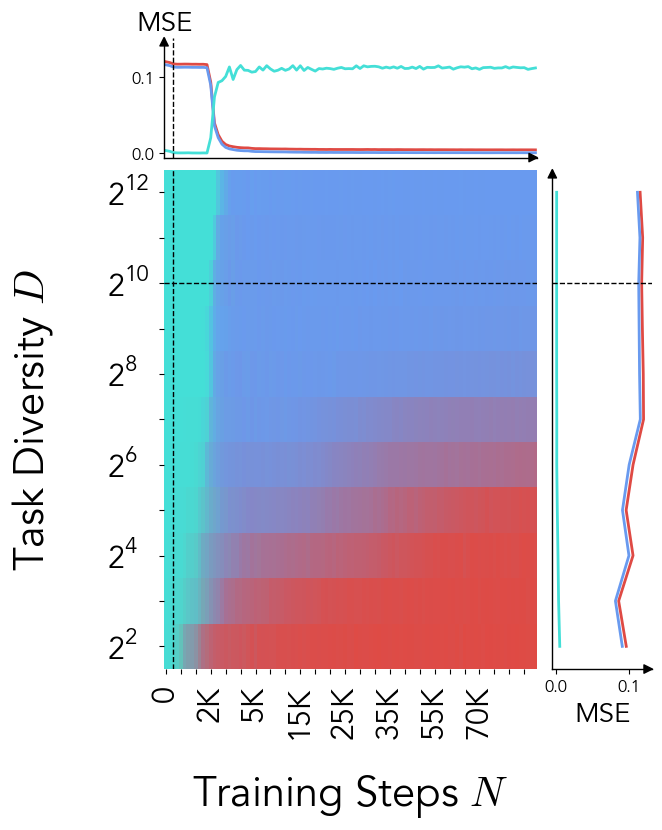

In [58]:
fig_gen.generate_relative_distance_plot(
    config={
        "fixed_values": fixed_values,
        "x_annotated": 2,
        "y_annotated": 8,
        "mode": "train",
    },
    show=True,
    save=True,
)

## Hierarchical Bayesian Model Framework


### Predicting using Bayesian Model 

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:2706: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for colorbars
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:2706: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for colorbars
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:2706: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for colorbars
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools

Saved figure to /sailhome/wurgaft/normative-icl/figures/linear-regression/prediction_comparison/prediction_comparison-linear-regression-64context_length__4mlp_expansion_factor__8num_dims.pdf


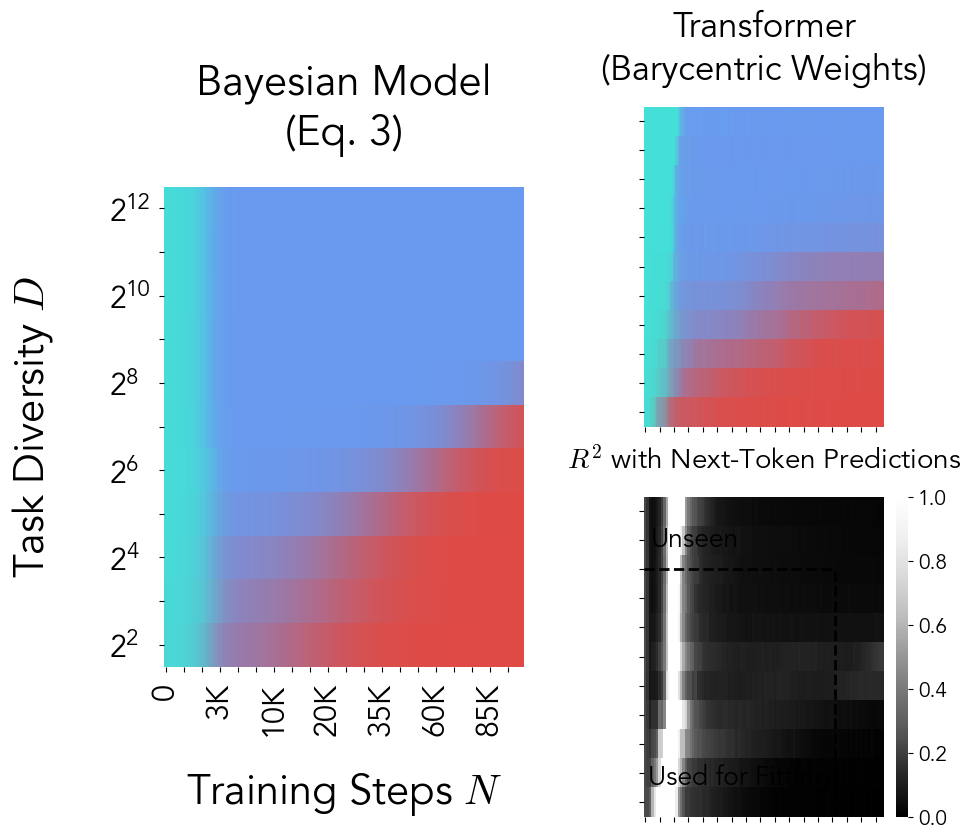

In [59]:
fig_gen.generate_prediction_comparison_plot(
    config={
        "fixed_values": fixed_values,
        "comparison_col": "barycentric_weights_train",
        "fit_results_col": "bms_multiple_predictor_results",
        "prediction_metric": "mse",
    },
    show=True,
    save=True,
)

### Intuitions from model

#### Probabilities of each algorithm across training time

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:meta dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'D', 'P', 'S', 'T', 'a', 'b', 'e', 'equal', 'five', 'four', 'g', 'i', 'k', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 12, 42, 45, 47, 62, 76, 105, 114, 120, 123, 125, 136, 142, 143, 152, 156, 163, 171, 176, 192, 195, 200, 204, 206, 211, 219, 222, 228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.nul

Saved figure to /sailhome/wurgaft/normative-icl/figures/linear-regression/algo_probabilities/algo_probabilities-linear-regression-64context_length__4mlp_expansion_factor__8num_dims.pdf


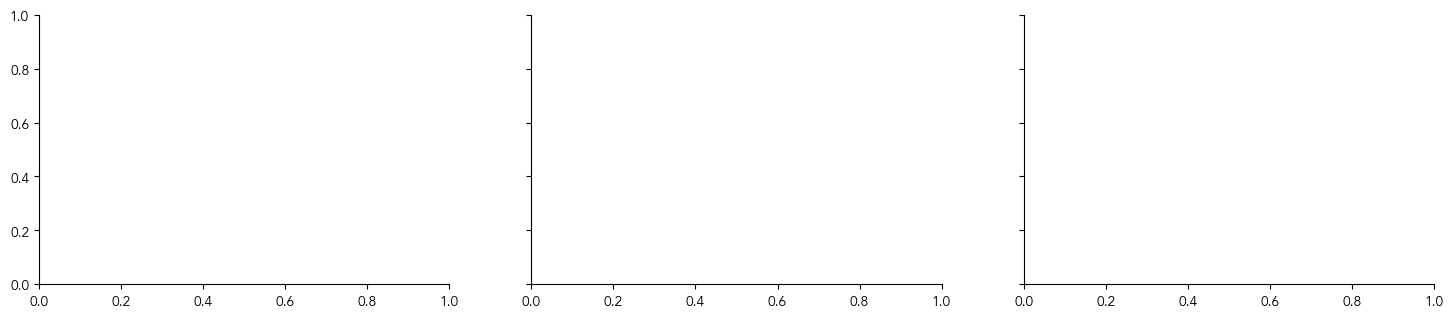

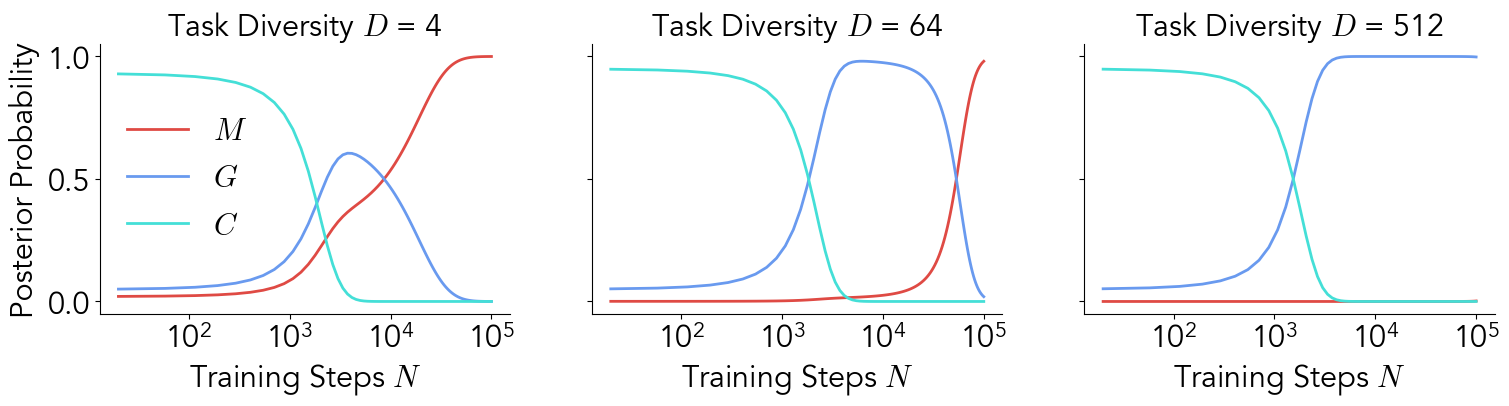

In [60]:
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 3.5), sharey=True)

# List of task diversity values to plot
task_diversity_values = [4, 64, 512]

fig_gen.generate_algorithm_probabilities_plot(
    config={
        "fixed_values": fixed_values,
        "task_diversity_values": task_diversity_values,
        "fit_results_col": "bms_multiple_predictor_results",
    },
    show=True,
    save=True,
)

In [61]:
weights = np.array(
    [
        np.array(arr)
        for arr in transformer_df["bms_multiple_predictor_results"].apply(
            lambda x: x["weights"]
        )
    ]
)
barycentric_weights = np.array(
    [np.array(arr) for arr in transformer_df["barycentric_weights_train"]]
)

# compute correlation between weights and barycentric weights
correlation = np.corrcoef(weights, barycentric_weights)[0, 1]
print("correlation between weights and barycentric weights:", correlation)

0.9999984010192813
